In [1]:
# Remember to update your path
%reload_ext autoreload
%autoreload 2

import sys
from datetime import date
sys.path.append('/Users/qiu_qiu/Projects/QiShiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *
from Backtesting.Vectorized.Strategy import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

from Backtesting.Vectorized.models import OneContractTest


# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

In [2]:
start = '20160701'
end = '20160930'
max_order=7
tcas = ['None']*max_order

In [17]:
px_th=[0.0/100, 0.015/100, 0.03/100]
th_type=[1, 2, 3]

In [18]:
i = 0
for pxth in px_th:
    i = i + 1
    for thtype in th_type:
        zn_mj = MajorContracts(symbol='zn', split_time='2016-7-1', topdir='/Users/qiu_qiu/Projects/QiShiQR/tick2016', 
                                                            maturity={'1603':['2016-1-1','2016-2-29'],
                                                                       '1604':['2016-2-1','2016-3-31'],
                                                                       '1605':['2016-3-1','2016-4-30'],
                                                                       '1606':['2016-4-1','2016-5-31'],
                                                                       '1607':['2016-5-1','2016-6-30'],
                                                                       '1608':['2016-6-1','2016-7-31'],
                                                                       '1609':['2016-7-1','2016-8-31'],
                                                                       '1610':['2016-8-1','2016-9-30'],
                                                                       '1611':['2016-9-1','2016-10-31'],
                                                                       '1612':['2016-10-1','2016-11-30'],
                                                                       '1701':['2016-11-1','2016-12-31'],
                                                                       '1702':['2016-12-1','2017-1-31'],
                                                                      },
                                                             transitions = {'1603':'2016-2-1', 
                                                                            '1604':'2016-3-1', 
                                                                            '1605':'2016-4-1', 
                                                                            '1606':'2016-5-1',
                                                                            '1607':'2016-6-1', 
                                                                            '1608':'2016-7-1', 
                                                                            '1609':'2016-8-1', 
                                                                            '1610':'2016-9-1',
                                                                            '1611':'2016-10-1', 
                                                                            '1612':'2016-11-1', 
                                                                            '1701':'2016-12-1', 
                                                                            '1702':'2017-1-1'
                                                                                     },
                               freq=freq, offset=offset, px_th=pxth)
        df_zn_train, df_zn_test, ptb = zn_mj.create_major_overlap()
        strategy = list(ptb.values())
        slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
        #slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm = SLM(slm, pxth, thtype).run()

        test = MajorSeriesTest(df_zn_test, OUTPUT_DIR,slm, px_th=pxth)
        test.build( max_order, offset, start, end, tcas)
        test.run()

        test.plot()
        test.results[0]['benchmark'].plot()
        plt.legend()
        plt.savefig('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'zn_' + str(i) + '_' + str(thtype) + '.png')
        plt.close()
        test.performance.to_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'zn_' + str(i) + '_' + str(thtype) + '.csv')
    


zn1603 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160229.0 20160331.0
zn1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160331.0 20160429.0
zn1607 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05

zn1609 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1609 ['2016-7-1', '2016-8-31'] 2016-07-01 00:00:00 2016-08-01 00:00:00
zn1610 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1610 ['2016-8-1', '2016-9-30'] 2016-08-01 00:00:00 2016-09-01 00:00:00
zn1611 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1611 ['2016-9-1', '2016-10-31'] 2016-09-01 00:00:00 2016-10-01 00:00:00
zn1612 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1612 ['2016-10-1', '2016-11-30'] 2016-10-01 00:00:00 2016-11-01 00:00:00
zn1701 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1701 ['2016-11-1', '2016-12-31'] 2016-11-01 00:00:00 2016-12-01 00:00:00
zn1702 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1702

zn1603 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160229.0 20160331.0
zn1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160331.0 20160429.0
zn1607 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016

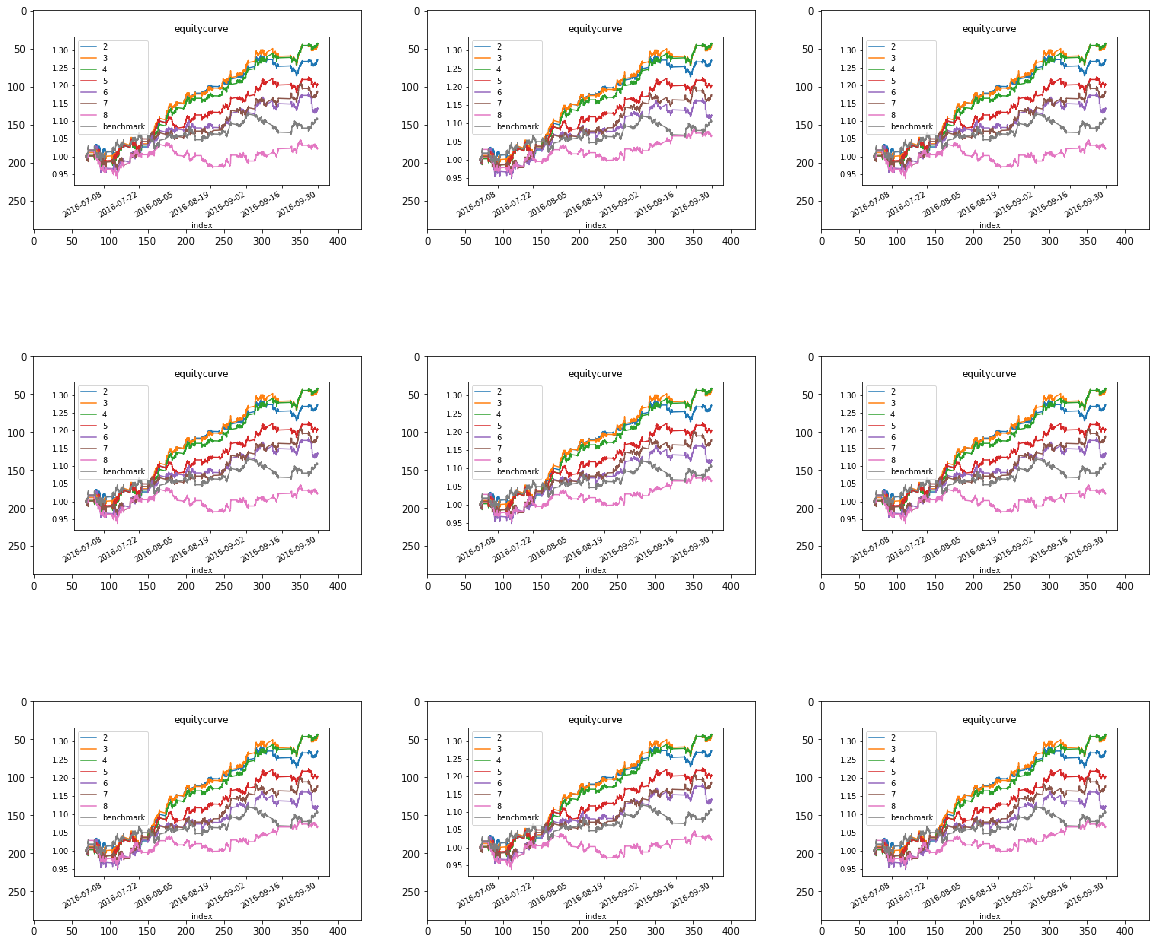

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_1.png')
img2=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_2.png')
img3=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_3.png')
img4=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_1.png')
img5=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_2.png')
img6=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_3.png')
img7=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_1.png')
img8=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_2.png')
img9=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_3.png')

fig = plt.figure(figsize=(20,18))
plt.subplot(331)
plt.imshow(img1)
plt.subplot(332)
plt.imshow(img2)
plt.subplot(333)
plt.imshow(img3)
plt.subplot(334)
plt.imshow(img4)
plt.subplot(335)
plt.imshow(img5)
plt.subplot(336)
plt.imshow(img6)
plt.subplot(337)
plt.imshow(img5)
plt.subplot(338)
plt.imshow(img6)
plt.subplot(339)
plt.imshow(img5)
plt.show()

In [20]:
import pandas as pd
perform1 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_1.csv')
perform2 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_2.csv')
perform3 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_3.csv')
perform4 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_1.csv')
perform5 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_2.csv')
perform6 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_3.csv')
perform7 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_1.csv')
perform8 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_2.csv')
perform9 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_3.csv')

display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)
display(perform6)
display(perform7)
display(perform8)
display(perform9)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157793,0.003631,-0.001442,0.000876,0.000069,-0.015588,0.007971,-0.047646,0.607646,5.753234,3945,1.272346,0.447148
1,1,0.161237,0.004208,-0.001513,0.000861,0.000105,-0.015588,0.009455,-0.043464,0.569416,6.524234,3012,1.315584,0.631806
2,2,0.155956,0.004258,-0.001520,0.000895,0.000115,-0.015588,0.009455,-0.041788,0.588554,6.825356,2767,1.319336,0.653415
3,3,0.160561,0.002725,-0.001484,0.000932,0.000074,-0.015588,0.009455,-0.050510,0.628036,4.242989,2776,1.204378,0.621037
4,4,0.192297,0.001813,-0.001464,0.000962,0.000045,-0.015588,0.009455,-0.078491,0.657311,2.357195,3050,1.135984,0.563607
5,5,0.169382,0.002455,-0.001326,0.001034,0.000056,-0.015588,0.009455,-0.052580,0.779396,3.623717,3274,1.184138,0.497251
6,6,0.148898,0.000302,-0.001278,0.001085,0.000007,-0.014731,0.009455,-0.079753,0.849325,0.506644,3406,1.022631,0.407810


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157793,0.003631,-0.001442,0.000876,0.000069,-0.015588,0.007971,-0.047646,0.607646,5.753234,3945,1.272346,0.447148
1,1,0.161237,0.004208,-0.001513,0.000861,0.000105,-0.015588,0.009455,-0.043464,0.569416,6.524234,3012,1.315584,0.631806
2,2,0.155956,0.004258,-0.001520,0.000895,0.000115,-0.015588,0.009455,-0.041788,0.588554,6.825356,2767,1.319336,0.653415
3,3,0.160753,0.002728,-0.001475,0.000927,0.000072,-0.015588,0.009455,-0.049203,0.628262,4.242689,2848,1.204608,0.602879
4,4,0.194224,0.001629,-0.001443,0.000950,0.000038,-0.015588,0.009455,-0.081253,0.657981,2.096736,3179,1.122171,0.531928
5,5,0.168041,0.002371,-0.001298,0.001000,0.000050,-0.015588,0.009455,-0.054095,0.769831,3.527512,3572,1.177830,0.451288
6,6,0.139374,0.000875,-0.001212,0.001040,0.000017,-0.014731,0.009455,-0.071677,0.857874,1.568992,3806,1.065603,0.358382


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157793,0.003631,-0.001442,0.000876,0.000069,-0.015588,0.007971,-0.047646,0.607646,5.753234,3945,1.272346,0.447148
1,1,0.161237,0.004208,-0.001513,0.000861,0.000105,-0.015588,0.009455,-0.043464,0.569416,6.524234,3012,1.315584,0.631806
2,2,0.155956,0.004258,-0.001520,0.000895,0.000115,-0.015588,0.009455,-0.041788,0.588554,6.825356,2767,1.319336,0.653415
3,3,0.160561,0.002725,-0.001484,0.000932,0.000074,-0.015588,0.009455,-0.050510,0.628036,4.242989,2776,1.204378,0.621037
4,4,0.192297,0.001813,-0.001464,0.000962,0.000045,-0.015588,0.009455,-0.078491,0.657311,2.357195,3050,1.135984,0.563607
5,5,0.169382,0.002455,-0.001326,0.001034,0.000056,-0.015588,0.009455,-0.052580,0.779396,3.623717,3274,1.184138,0.497251
6,6,0.148898,0.000302,-0.001278,0.001085,0.000007,-0.014731,0.009455,-0.079753,0.849325,0.506644,3406,1.022631,0.407810


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157793,0.003631,-0.001442,0.000876,0.000069,-0.015588,0.007971,-0.047646,0.607646,5.753234,3945,1.272346,0.447148
1,1,0.161237,0.004208,-0.001513,0.000861,0.000105,-0.015588,0.009455,-0.043464,0.569416,6.524234,3012,1.315584,0.631806
2,2,0.155956,0.004258,-0.001520,0.000895,0.000115,-0.015588,0.009455,-0.041788,0.588554,6.825356,2767,1.319336,0.653415
3,3,0.160561,0.002725,-0.001484,0.000932,0.000074,-0.015588,0.009455,-0.050510,0.628036,4.242989,2776,1.204378,0.621037
4,4,0.192297,0.001813,-0.001464,0.000962,0.000045,-0.015588,0.009455,-0.078491,0.657311,2.357195,3050,1.135984,0.563607
5,5,0.169382,0.002455,-0.001326,0.001034,0.000056,-0.015588,0.009455,-0.052580,0.779396,3.623717,3274,1.184138,0.497251
6,6,0.148898,0.000302,-0.001278,0.001085,0.000007,-0.014731,0.009455,-0.079753,0.849325,0.506644,3406,1.022631,0.407810


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157793,0.003631,-0.001442,0.000876,0.000069,-0.015588,0.007971,-0.047646,0.607646,5.753234,3945,1.272346,0.447148
1,1,0.161237,0.004208,-0.001513,0.000861,0.000105,-0.015588,0.009455,-0.043464,0.569416,6.524234,3012,1.315584,0.631806
2,2,0.155956,0.004258,-0.001520,0.000895,0.000115,-0.015588,0.009455,-0.041788,0.588554,6.825356,2767,1.319336,0.653415
3,3,0.160753,0.002728,-0.001475,0.000927,0.000072,-0.015588,0.009455,-0.049203,0.628262,4.242689,2848,1.204608,0.602879
4,4,0.194224,0.001629,-0.001443,0.000950,0.000038,-0.015588,0.009455,-0.081253,0.657981,2.096736,3179,1.122171,0.531928
5,5,0.168041,0.002371,-0.001298,0.001000,0.000050,-0.015588,0.009455,-0.054095,0.769831,3.527512,3572,1.177830,0.451288
6,6,0.139374,0.000875,-0.001212,0.001040,0.000017,-0.014731,0.009455,-0.071677,0.857874,1.568992,3806,1.065603,0.358382


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.157793,0.003631,-0.001442,0.000876,0.000069,-0.015588,0.007971,-0.047646,0.607646,5.753234,3945,1.272346,0.447148
1,1,0.161237,0.004208,-0.001513,0.000861,0.000105,-0.015588,0.009455,-0.043464,0.569416,6.524234,3012,1.315584,0.631806
2,2,0.155956,0.004258,-0.001520,0.000895,0.000115,-0.015588,0.009455,-0.041788,0.588554,6.825356,2767,1.319336,0.653415
3,3,0.160561,0.002725,-0.001484,0.000932,0.000074,-0.015588,0.009455,-0.050510,0.628036,4.242989,2776,1.204378,0.621037
4,4,0.192297,0.001813,-0.001464,0.000962,0.000045,-0.015588,0.009455,-0.078491,0.657311,2.357195,3050,1.135984,0.563607
5,5,0.169382,0.002455,-0.001326,0.001034,0.000056,-0.015588,0.009455,-0.052580,0.779396,3.623717,3274,1.184138,0.497251
6,6,0.148898,0.000302,-0.001278,0.001085,0.000007,-0.014731,0.009455,-0.079753,0.849325,0.506644,3406,1.022631,0.407810


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.146127,0.003083,-0.001221,0.000918,5.893371e-05,-0.014765,0.007971,-0.037021,0.751336,5.275227,3924,1.231256,0.350153
1,1,0.155871,0.003112,-0.001508,0.000972,8.362600e-05,-0.015588,0.009455,-0.041365,0.644649,4.991312,2791,1.233400,0.513436
2,2,0.175641,0.003416,-0.001530,0.001046,1.030891e-04,-0.014765,0.013638,-0.057700,0.683563,4.861752,2485,1.256176,0.550101
3,3,0.189816,0.002299,-0.001381,0.001106,6.307913e-05,-0.013907,0.013638,-0.060174,0.800655,3.028524,2734,1.172458,0.495611
4,4,0.175654,0.000933,-0.001350,0.001062,2.218195e-05,-0.013772,0.009455,-0.078585,0.786551,1.328064,3155,1.069984,0.456101
5,5,0.139248,0.000024,-0.001212,0.001043,5.003510e-07,-0.014080,0.009047,-0.093836,0.861126,0.042484,3547,1.001775,0.376656
6,6,0.109245,-0.001602,-0.001211,0.001029,-3.395063e-05,-0.011310,0.007585,-0.149547,0.849738,-3.666118,3539,0.879849,0.312518


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.146127,0.003083,-0.001221,0.000918,0.000059,-0.014765,0.007971,-0.037021,0.751336,5.275227,3924,1.231256,0.350153
1,1,0.155871,0.003112,-0.001508,0.000972,0.000084,-0.015588,0.009455,-0.041365,0.644649,4.991312,2791,1.233400,0.513436
2,2,0.175641,0.003416,-0.001530,0.001046,0.000103,-0.014765,0.013638,-0.057700,0.683563,4.861752,2485,1.256176,0.550101
3,3,0.190758,0.002044,-0.001401,0.001100,0.000056,-0.013907,0.013638,-0.061104,0.785477,2.679341,2753,1.153332,0.478387
4,4,0.176691,0.001194,-0.001327,0.001048,0.000027,-0.013772,0.009455,-0.080213,0.789953,1.688714,3314,1.089514,0.430296
5,5,0.134843,0.000223,-0.001228,0.001029,0.000005,-0.014080,0.009047,-0.095998,0.837957,0.413299,3670,1.016719,0.350409
6,6,0.101444,-0.001217,-0.001150,0.000989,-0.000025,-0.011310,0.007585,-0.119674,0.859780,-2.999053,3596,0.908729,0.292269


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.146127,0.003083,-0.001221,0.000918,5.893371e-05,-0.014765,0.007971,-0.037021,0.751336,5.275227,3924,1.231256,0.350153
1,1,0.155871,0.003112,-0.001508,0.000972,8.362600e-05,-0.015588,0.009455,-0.041365,0.644649,4.991312,2791,1.233400,0.513436
2,2,0.175641,0.003416,-0.001530,0.001046,1.030891e-04,-0.014765,0.013638,-0.057700,0.683563,4.861752,2485,1.256176,0.550101
3,3,0.189816,0.002299,-0.001381,0.001106,6.307913e-05,-0.013907,0.013638,-0.060174,0.800655,3.028524,2734,1.172458,0.495611
4,4,0.175654,0.000933,-0.001350,0.001062,2.218195e-05,-0.013772,0.009455,-0.078585,0.786551,1.328064,3155,1.069984,0.456101
5,5,0.139248,0.000024,-0.001212,0.001043,5.003510e-07,-0.014080,0.009047,-0.093836,0.861126,0.042484,3547,1.001775,0.376656
6,6,0.109245,-0.001602,-0.001211,0.001029,-3.395063e-05,-0.011310,0.007585,-0.149547,0.849738,-3.666118,3539,0.879849,0.312518


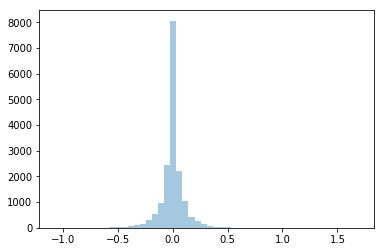

In [14]:
import seaborn as sns
zn_pct_change_train = df_zn_train.LastPrice.pct_change().dropna().values*100
sns.distplot(zn_pct_change_train, kde=False)

In [16]:
np.std(zn_pct_change_train)

0.1129395974200197

#----------------

In [21]:
start = '20161008'
end = '20161228'
max_order=7
tcas = ['None']*max_order

In [22]:
i = 0
for pxth in px_th:
    i = i + 1
    for thtype in th_type:
        zn_mj = MajorContracts(symbol='zn', split_time='2016-7-1', topdir='/Users/qiu_qiu/Projects/QiShiQR/tick2016', 
                                                            maturity={'1603':['2016-1-1','2016-2-29'],
                                                                       '1604':['2016-2-1','2016-3-31'],
                                                                       '1605':['2016-3-1','2016-4-30'],
                                                                       '1606':['2016-4-1','2016-5-31'],
                                                                       '1607':['2016-5-1','2016-6-30'],
                                                                       '1608':['2016-6-1','2016-7-31'],
                                                                       '1609':['2016-7-1','2016-8-31'],
                                                                       '1610':['2016-8-1','2016-9-30'],
                                                                       '1611':['2016-9-1','2016-10-31'],
                                                                       '1612':['2016-10-1','2016-11-30'],
                                                                       '1701':['2016-11-1','2016-12-31'],
                                                                       '1702':['2016-12-1','2017-1-31'],
                                                                      },
                                                             transitions = {'1603':'2016-2-1', 
                                                                            '1604':'2016-3-1', 
                                                                            '1605':'2016-4-1', 
                                                                            '1606':'2016-5-1',
                                                                            '1607':'2016-6-1', 
                                                                            '1608':'2016-7-1', 
                                                                            '1609':'2016-8-1', 
                                                                            '1610':'2016-9-1',
                                                                            '1611':'2016-10-1', 
                                                                            '1612':'2016-11-1', 
                                                                            '1701':'2016-12-1', 
                                                                            '1702':'2017-1-1'
                                                                                     },
                               freq=freq, offset=offset, px_th=pxth)
        df_zn_train, df_zn_test, ptb = zn_mj.create_major_overlap()
        strategy = list(ptb.values())
        slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
        #slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm = SLM(slm, pxth, thtype).run()

        test = MajorSeriesTest(df_zn_test, OUTPUT_DIR,slm, px_th=pxth)
        test.build( max_order, offset, start, end, tcas)
        test.run()

        test.plot()
        test.results[0]['benchmark'].plot()
        plt.legend()
        plt.savefig('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'zn_' + str(i) + '_' + str(thtype) + '.png')
        plt.close()
        test.performance.to_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/' + 'zn_' + str(i) + '_' + str(thtype) + '.csv')
    



zn1603 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160229.0 20160331.0
zn1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160331.0 20160429.0
zn1607 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05

zn1609 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1609 ['2016-7-1', '2016-8-31'] 2016-07-01 00:00:00 2016-08-01 00:00:00
zn1610 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1610 ['2016-8-1', '2016-9-30'] 2016-08-01 00:00:00 2016-09-01 00:00:00
zn1611 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1611 ['2016-9-1', '2016-10-31'] 2016-09-01 00:00:00 2016-10-01 00:00:00
zn1612 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1612 ['2016-10-1', '2016-11-30'] 2016-10-01 00:00:00 2016-11-01 00:00:00
zn1701 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1701 ['2016-11-1', '2016-12-31'] 2016-11-01 00:00:00 2016-12-01 00:00:00
zn1702 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.00015
ID trade_range transition_begin transition_end
1702

zn1603 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
zn1604 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
zn1605 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160229.0 20160331.0
zn1606 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160331.0 20160429.0
zn1607 /Users/qiu_qiu/Projects/QiShiQR/tick2016/zn
0.0003
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016

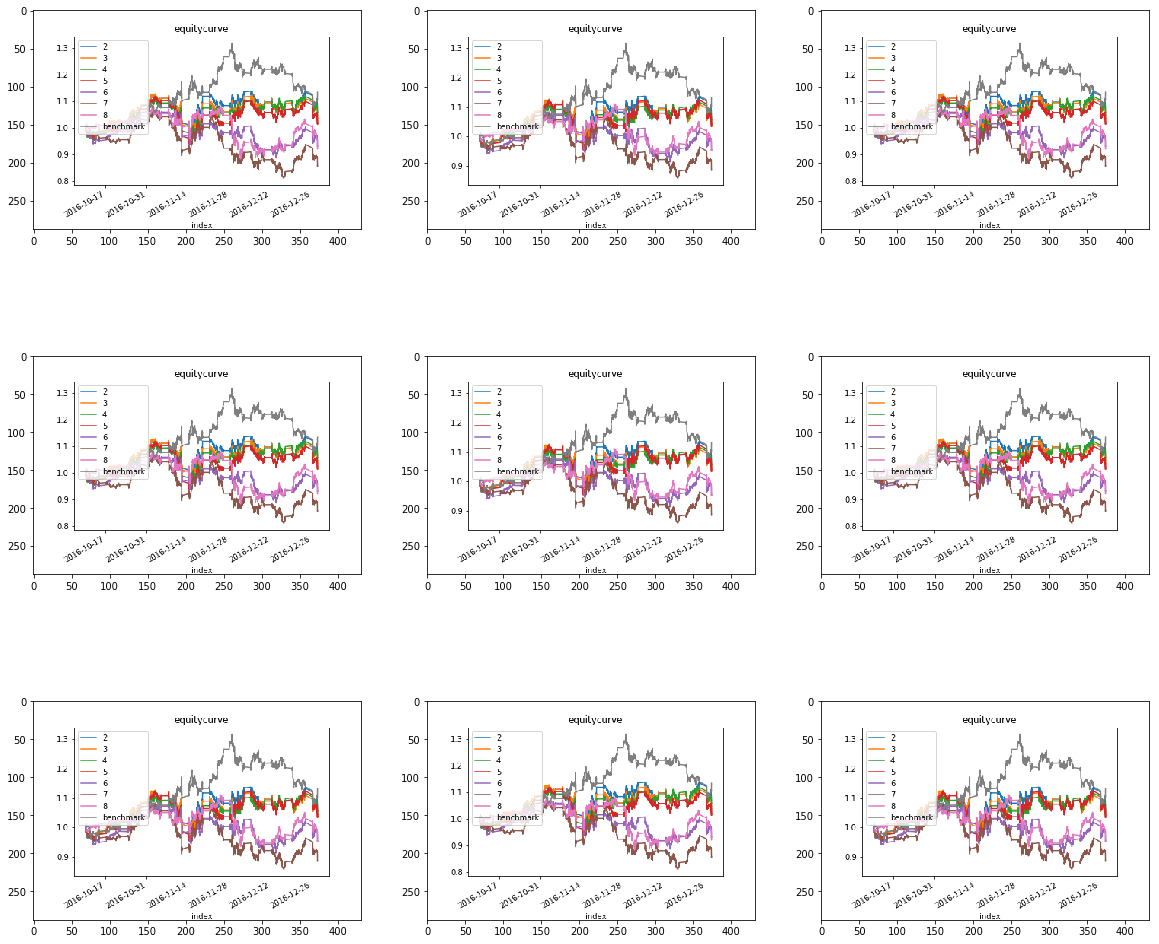

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_1.png')
img2=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_2.png')
img3=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_3.png')
img4=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_1.png')
img5=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_2.png')
img6=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_3.png')
img7=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_1.png')
img8=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_2.png')
img9=mpimg.imread('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_3.png')

fig = plt.figure(figsize=(20,18))
plt.subplot(331)
plt.imshow(img1)
plt.subplot(332)
plt.imshow(img2)
plt.subplot(333)
plt.imshow(img3)
plt.subplot(334)
plt.imshow(img4)
plt.subplot(335)
plt.imshow(img5)
plt.subplot(336)
plt.imshow(img6)
plt.subplot(337)
plt.imshow(img5)
plt.subplot(338)
plt.imshow(img6)
plt.subplot(339)
plt.imshow(img5)
plt.show()

In [24]:
import pandas as pd
perform1 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_1.csv')
perform2 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_2.csv')
perform3 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_1_3.csv')
perform4 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_1.csv')
perform5 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_2.csv')
perform6 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_2_3.csv')
perform7 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_1.csv')
perform8 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_2.csv')
perform9 = pd.read_csv('/Users/qiu_qiu/Projects/QiShiQR/performance/zn_3_3.csv')

display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)
display(perform6)
display(perform7)
display(perform8)
display(perform9)

,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.316321,0.000835,-0.002738,0.001497,0.000017,-0.054822,0.019105,-0.129808,0.546672,0.659955,3309,1.056782,0.500151
1,1,0.319119,0.000531,-0.002932,0.001496,0.000013,-0.054822,0.019105,-0.131654,0.510066,0.415979,2710,1.036107,0.634686
2,2,0.310239,0.000670,-0.002962,0.001544,0.000018,-0.055774,0.019105,-0.136612,0.521231,0.539875,2535,1.045557,0.648126
3,3,0.314327,0.000214,-0.002803,0.001594,0.000006,-0.054822,0.025530,-0.162334,0.568634,0.170086,2593,1.014542,0.624759
4,4,0.280563,-0.001022,-0.002787,0.001598,-0.000026,-0.054822,0.019105,-0.172822,0.573167,-0.911028,2700,0.930477,0.590000
5,5,0.354049,-0.002101,-0.002551,0.001778,-0.000051,-0.050765,0.020268,-0.239983,0.696779,-1.483530,2817,0.857134,0.506922
6,6,0.323384,-0.001144,-0.002441,0.001886,-0.000026,-0.035736,0.023063,-0.182879,0.772658,-0.884480,3023,0.922201,0.458154


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.316321,0.000835,-0.002738,0.001497,0.000017,-0.054822,0.019105,-0.129808,0.546672,0.659955,3309,1.056782,0.500151
1,1,0.319119,0.000531,-0.002932,0.001496,0.000013,-0.054822,0.019105,-0.131654,0.510066,0.415979,2710,1.036107,0.634686
2,2,0.310239,0.000670,-0.002962,0.001544,0.000018,-0.055774,0.019105,-0.136612,0.521231,0.539875,2535,1.045557,0.648126
3,3,0.312851,0.000526,-0.002787,0.001587,0.000014,-0.054822,0.025530,-0.151873,0.569660,0.420383,2640,1.035773,0.616288
4,4,0.284559,-0.000686,-0.002807,0.001602,-0.000017,-0.054822,0.019105,-0.158728,0.570942,-0.602803,2767,0.953343,0.569931
5,5,0.344700,-0.001661,-0.002513,0.001742,-0.000037,-0.050765,0.020268,-0.203359,0.693105,-1.204477,3013,0.887070,0.473614
6,6,0.289425,-0.000644,-0.002343,0.001839,-0.000013,-0.035736,0.023063,-0.159678,0.785208,-0.556279,3422,0.956208,0.400935


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.316321,0.000835,-0.002738,0.001497,0.000017,-0.054822,0.019105,-0.129808,0.546672,0.659955,3309,1.056782,0.500151
1,1,0.319119,0.000531,-0.002932,0.001496,0.000013,-0.054822,0.019105,-0.131654,0.510066,0.415979,2710,1.036107,0.634686
2,2,0.310239,0.000670,-0.002962,0.001544,0.000018,-0.055774,0.019105,-0.136612,0.521231,0.539875,2535,1.045557,0.648126
3,3,0.314327,0.000214,-0.002803,0.001594,0.000006,-0.054822,0.025530,-0.162334,0.568634,0.170086,2593,1.014542,0.624759
4,4,0.280563,-0.001022,-0.002787,0.001598,-0.000026,-0.054822,0.019105,-0.172822,0.573167,-0.911028,2700,0.930477,0.590000
5,5,0.354049,-0.002101,-0.002551,0.001778,-0.000051,-0.050765,0.020268,-0.239983,0.696779,-1.483530,2817,0.857134,0.506922
6,6,0.323384,-0.001144,-0.002441,0.001886,-0.000026,-0.035736,0.023063,-0.182879,0.772658,-0.884480,3023,0.922201,0.458154


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.316321,0.000835,-0.002738,0.001497,0.000017,-0.054822,0.019105,-0.129808,0.546672,0.659955,3309,1.056782,0.500151
1,1,0.319119,0.000531,-0.002932,0.001496,0.000013,-0.054822,0.019105,-0.131654,0.510066,0.415979,2710,1.036107,0.634686
2,2,0.310239,0.000670,-0.002962,0.001544,0.000018,-0.055774,0.019105,-0.136612,0.521231,0.539875,2535,1.045557,0.648126
3,3,0.314327,0.000214,-0.002803,0.001594,0.000006,-0.054822,0.025530,-0.162334,0.568634,0.170086,2593,1.014542,0.624759
4,4,0.280563,-0.001022,-0.002787,0.001598,-0.000026,-0.054822,0.019105,-0.172822,0.573167,-0.911028,2700,0.930477,0.590000
5,5,0.354049,-0.002101,-0.002551,0.001778,-0.000051,-0.050765,0.020268,-0.239983,0.696779,-1.483530,2817,0.857134,0.506922
6,6,0.323384,-0.001144,-0.002441,0.001886,-0.000026,-0.035736,0.023063,-0.182879,0.772658,-0.884480,3023,0.922201,0.458154


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.316321,0.000835,-0.002738,0.001497,0.000017,-0.054822,0.019105,-0.129808,0.546672,0.659955,3309,1.056782,0.500151
1,1,0.319119,0.000531,-0.002932,0.001496,0.000013,-0.054822,0.019105,-0.131654,0.510066,0.415979,2710,1.036107,0.634686
2,2,0.310239,0.000670,-0.002962,0.001544,0.000018,-0.055774,0.019105,-0.136612,0.521231,0.539875,2535,1.045557,0.648126
3,3,0.312851,0.000526,-0.002787,0.001587,0.000014,-0.054822,0.025530,-0.151873,0.569660,0.420383,2640,1.035773,0.616288
4,4,0.284559,-0.000686,-0.002807,0.001602,-0.000017,-0.054822,0.019105,-0.158728,0.570942,-0.602803,2767,0.953343,0.569931
5,5,0.344700,-0.001661,-0.002513,0.001742,-0.000037,-0.050765,0.020268,-0.203359,0.693105,-1.204477,3013,0.887070,0.473614
6,6,0.289425,-0.000644,-0.002343,0.001839,-0.000013,-0.035736,0.023063,-0.159678,0.785208,-0.556279,3422,0.956208,0.400935


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.316321,0.000835,-0.002738,0.001497,0.000017,-0.054822,0.019105,-0.129808,0.546672,0.659955,3309,1.056782,0.500151
1,1,0.319119,0.000531,-0.002932,0.001496,0.000013,-0.054822,0.019105,-0.131654,0.510066,0.415979,2710,1.036107,0.634686
2,2,0.310239,0.000670,-0.002962,0.001544,0.000018,-0.055774,0.019105,-0.136612,0.521231,0.539875,2535,1.045557,0.648126
3,3,0.314327,0.000214,-0.002803,0.001594,0.000006,-0.054822,0.025530,-0.162334,0.568634,0.170086,2593,1.014542,0.624759
4,4,0.280563,-0.001022,-0.002787,0.001598,-0.000026,-0.054822,0.019105,-0.172822,0.573167,-0.911028,2700,0.930477,0.590000
5,5,0.354049,-0.002101,-0.002551,0.001778,-0.000051,-0.050765,0.020268,-0.239983,0.696779,-1.483530,2817,0.857134,0.506922
6,6,0.323384,-0.001144,-0.002441,0.001886,-0.000026,-0.035736,0.023063,-0.182879,0.772658,-0.884480,3023,0.922201,0.458154


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.297908,0.000903,-0.002477,0.001540,0.000018,-0.054822,0.013023,-0.114720,0.621499,0.757910,3487,1.061414,0.426728
1,1,0.315815,0.001590,-0.002975,0.001625,0.000041,-0.054822,0.019105,-0.124124,0.546094,1.258450,2613,1.108103,0.579793
2,2,0.327001,0.001144,-0.003020,0.001697,0.000033,-0.056012,0.019105,-0.136095,0.561888,0.874718,2335,1.077801,0.607281
3,3,0.309486,-0.001275,-0.002857,0.001798,-0.000036,-0.054822,0.025530,-0.200754,0.629396,-1.030226,2429,0.913275,0.563606
4,4,0.342951,-0.000133,-0.002666,0.001751,-0.000003,-0.054822,0.016120,-0.186697,0.656777,-0.097237,2773,0.990929,0.537324
5,5,0.339138,0.001542,-0.002336,0.001896,0.000035,-0.050765,0.018726,-0.131783,0.811677,1.136626,3005,1.104849,0.452579
6,6,0.319872,-0.000052,-0.002337,0.001974,-0.000001,-0.031389,0.025530,-0.158116,0.844837,-0.040894,3127,0.996442,0.388551


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.297908,0.000903,-0.002477,0.001540,0.000018,-0.054822,0.013023,-0.114720,0.621499,0.757910,3487,1.061414,0.426728
1,1,0.315815,0.001590,-0.002975,0.001625,0.000041,-0.054822,0.019105,-0.124124,0.546094,1.258450,2613,1.108103,0.579793
2,2,0.327001,0.001144,-0.003020,0.001697,0.000033,-0.056012,0.019105,-0.136095,0.561888,0.874718,2335,1.077801,0.607281
3,3,0.309099,-0.001029,-0.002864,0.001789,-0.000028,-0.054822,0.025530,-0.182868,0.624593,-0.832314,2480,0.930023,0.550403
4,4,0.338939,-0.000116,-0.002663,0.001743,-0.000003,-0.054822,0.016120,-0.174345,0.654440,-0.085873,2886,0.992083,0.509356
5,5,0.340335,0.001619,-0.002302,0.001853,0.000035,-0.050765,0.017436,-0.125100,0.805189,1.189074,3171,1.110074,0.414696
6,6,0.315085,-0.000274,-0.002215,0.001865,-0.000006,-0.029825,0.023063,-0.182144,0.842024,-0.217372,3361,0.981371,0.351086


,Unnamed: 0,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0,0.297908,0.000903,-0.002477,0.001540,0.000018,-0.054822,0.013023,-0.114720,0.621499,0.757910,3487,1.061414,0.426728
1,1,0.315815,0.001590,-0.002975,0.001625,0.000041,-0.054822,0.019105,-0.124124,0.546094,1.258450,2613,1.108103,0.579793
2,2,0.327001,0.001144,-0.003020,0.001697,0.000033,-0.056012,0.019105,-0.136095,0.561888,0.874718,2335,1.077801,0.607281
3,3,0.309486,-0.001275,-0.002857,0.001798,-0.000036,-0.054822,0.025530,-0.200754,0.629396,-1.030226,2429,0.913275,0.563606
4,4,0.342951,-0.000133,-0.002666,0.001751,-0.000003,-0.054822,0.016120,-0.186697,0.656777,-0.097237,2773,0.990929,0.537324
5,5,0.339138,0.001542,-0.002336,0.001896,0.000035,-0.050765,0.018726,-0.131783,0.811677,1.136626,3005,1.104849,0.452579
6,6,0.319872,-0.000052,-0.002337,0.001974,-0.000001,-0.031389,0.025530,-0.158116,0.844837,-0.040894,3127,0.996442,0.388551
